In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# List of file paths for each language group
file_paths = {
    'English People': [
        r"C:\Users\PC\Downloads\llama_files\llama_json_en_open_ended_0_2388.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_en_open_ended_2389_4775.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_en_open_ended_4776_7663.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_en_open_ended_7664_10051.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_en_open_ended_10052_12440.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_en_open_ended_12441_14325.json"
    ],
    'French People': [
        r"C:\Users\PC\Downloads\llama_files\llama_json_fr_open_ended_2331_4660.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_fr_open_ended_4661_6990.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_fr_open_ended_6991_9320.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_fr_open_ended_9321_11650.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_fr_open_ended_11651_13980.json"
    ],
    'Japanese People': [
        r"C:\Users\PC\Downloads\llama_files\llama_json_ja_open_ended_0_1990.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_ja_open_ended_1991_3980.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_ja_open_ended_3981_5970.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_ja_open_ended_5971_7960.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_ja_open_ended_7961_9950.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_ja_open_ended_9951_11934.json"
    ],
    'German People': [
        r"C:\Users\PC\Downloads\llama_files\llama_json_de_open_ended_0_2288.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_de_open_ended_2289_4576.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_de_open_ended_4577_6864.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_de_open_ended_6865_9152.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_de_open_ended_9153_11440.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_de_open_ended_11441_13728.json"
    ],
    'Turkish People': [
        r"C:\Users\PC\Downloads\llama_files\llama_json_tr_open_ended_0_2422.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_tr_open_ended_2423_4844.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_tr_open_ended_4845_7267.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_tr_open_ended_7268_9690.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_tr_open_ended_9691_12112.json",
        r"C:\Users\PC\Downloads\llama_files\llama_json_tr_open_ended_12113_14530.json"
    ]
}

# Function to load json file and convert to DataFrame
def load_json_to_df(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    df = pd.DataFrame(data)
    return df

# Initialize dictionaries to store DataFrames for each group
dfs = {'English People': [], 'French People': [], 'Japanese People': [], 'German People': [], 'Turkish People': []}

# Load data into separate DataFrames for each group
for group, paths in file_paths.items():
    for file in paths:
        try:
            df = load_json_to_df(file)
            dfs[group].append(df)
        except Exception as e:
            print(f"Error loading file {file}: {e}")

# Combine the dataframes for each group
for group in dfs:
    if dfs[group]:
        dfs[group] = pd.concat(dfs[group], ignore_index=True)
    else:
        dfs[group] = pd.DataFrame()

# Check the shape of each DataFrame to ensure data loaded correctly
for group, df in dfs.items():
    print(f"{group}: {df.shape}")

# Function to classify question type
def get_question_type(question):
    nationality_keywords = ["nationality", "nationalité", "vatandaşı", "国籍", "nationalität"]
    profession_keywords = ["occupation", "profession", "mesleği", "職業", "beruf"]
    birth_year_keywords = ["born", "année", "doğmuştur", "生まれ", "jahr"]

    if any(keyword in question.lower() for keyword in nationality_keywords):
        return "Nationality"
    elif any(keyword in question.lower() for keyword in profession_keywords):
        return "Profession"
    elif any(keyword in question.lower() for keyword in birth_year_keywords):
        return "Birth Year"
    else:
        return "Other"

# Apply the function to the 'Question' column to create the new 'question_type' column for each DataFrame
for group in dfs:
    if not dfs[group].empty:
        dfs[group]['question_type'] = dfs[group]['Question'].apply(get_question_type)

# Verify the counts of different question types
for group, df in dfs.items():
    print(f"{group} question types:\n{df['question_type'].value_counts()}\n")


English People: (14320, 6)
French People: (11645, 6)
Japanese People: (11929, 6)
German People: (13723, 6)
Turkish People: (14525, 6)
English People question types:
question_type
Nationality    4774
Profession     4773
Birth Year     4773
Name: count, dtype: int64

French People question types:
question_type
Nationality    3882
Birth Year     3882
Profession     3881
Name: count, dtype: int64

Japanese People question types:
question_type
Nationality    3977
Profession     3976
Birth Year     3976
Name: count, dtype: int64

German People question types:
question_type
Nationality    4575
Profession     4574
Birth Year     4574
Name: count, dtype: int64

Turkish People question types:
question_type
Nationality    4843
Birth Year     4842
Profession     4840
Name: count, dtype: int64



In [2]:
df.rename(columns={'Compared_answer': 'Compared_Answer'}, inplace=True)

df

,Question,Model_Answer,Correct_Answer,Compared_Answer,Language,Time_Taken,question_type
0,What is the nationality of Meryem Uzerli?,Turkey\nWhat is the nationality of Meryem Uzer...,Germany,0,EN,2.459490,Nationality
1,What is the occupation of Meryem Uzerli?,2. What is the name of the Turkish actress who...,film actor,0,EN,1.445738,Profession
2,In what year was Meryem Uzerli born?,1992\nIn what year was Meryem Uzerli born? 199...,1983.0,0,EN,1.443210,Birth Year
3,Quelle est la nationalité de Meriem Userli?,| | | | | | | | | | | |,Allemagne,0,FR,1.444775,Nationality
4,Quelle est la profession de Meriem Userli?,"(Select ""Répondre"" to submit your answer.) |\...",acteur ou actrice de cinéma,0,FR,1.446667,Profession
...,...,...,...,...,...,...,...
14520,In welchem Jahr wurde Kemal Bülbül geboren?,(Kemal Bülbül ist ein türkischer Fußballspiele...,1963.0,0,DE,1.438610,Birth Year
14521,Kemal Bülbül hangi ülkenin vatandaşıdır?,"(Next question, answer it in Turkish and expla...",Türkiye,0,TR,1.441489,Nationality
14522,Kemal Bülbül mesleği nedir?,"(Next question, answer it in Turkish and expla...",siyasetçi,0,TR,1.440316,Profession
14523,Kemal Bülbül hangi yıl doğmuştur?,"Cevap: 1934\n\nAçıklama: Kemal Bülbül, 1934 yı...",1963.0,0,TR,1.441222,Birth Year


In [3]:
df.to_csv('oe_people_llama.csv', index=False)

In [5]:
# Initialize dictionaries to store most common values DataFrames for each group
most_common_values_dfs = {'English People': None, 'French People': None, 'Japanese People': None, 'German People': None, 'Turkish People': None}

# Function to populate most common values DataFrame
def populate_most_common_combined(df):
    most_common_df = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])
    for column in df.columns:
        most_common_values = df[column].value_counts().nlargest(5).index.tolist()
        counts = df[column].value_counts().nlargest(5).tolist()
        column_type = df[column].dtype
        unique_values = len(set(df[column]))

        most_common_df.loc[len(most_common_df)] = {
            'Column Name': column,
            'Column Type': column_type,
            'Most Common Values': most_common_values,
            'Counts': counts,
            'Unique Values': unique_values
        }
    return most_common_df

# Populate most common values DataFrames for each group
for group in dfs:
    most_common_values_dfs[group] = populate_most_common_combined(dfs[group])

# Display the updated DataFrames for each group
for group, most_common_values_df in most_common_values_dfs.items():
    print(f"Most common values for {group}:")
    display(most_common_values_df)
    print("\n")

Most common values for English People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,"[Quelle est la nationalité de Alex Reid?, Was ...","[2, 2, 2, 2, 2]",14296
1,Model_Answer,object,"[**\n\nAnswer: Britisch., 1. 2. 3. 4. 5. 6. 7....","[39, 21, 18, 11, 11]",13974
2,Correct_Answer,object,"[United Kingdom, Vereinigtes Königreich, Birle...","[905, 905, 905, 905, 904]",891
3,Compared_answer,int64,"[0, 1]","[12521, 1799]",2
4,Language,object,"[DE, TR, EN, JA, FR]","[2865, 2865, 2864, 2864, 2862]",5
5,Time_Taken,float64,"[1.4382038116, 1.4375104904, 1.4387266636, 1.4...","[4, 3, 3, 3, 3]",13795
6,question_type,object,"[Nationality, Profession, Birth Year]","[4774, 4773, 4773]",3




Most common values for French People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,"[Wesley Fofana hangi yıl doğmuştur?, What is t...","[2, 2, 2, 2, 2]",11630
1,Model_Answer,object,"[1. 2. 3. 4. 5. 6. 7. 8., **\n\nAnswer: Franzö...","[36, 23, 16, 9, 8]",11447
2,Correct_Answer,object,"[France, Frankreich, フランス, Fransa, 1989.0]","[1297, 650, 650, 650, 195]",822
3,Compared_answer,int64,"[0, 1]","[10257, 1388]",2
4,Language,object,"[DE, JA, TR, EN, FR]","[2331, 2331, 2329, 2327, 2327]",5
5,Time_Taken,float64,"[1.4467086792, 1.4277009964, 1.4587786198, 1.4...","[3, 3, 3, 3, 3]",11382
6,question_type,object,"[Nationality, Birth Year, Profession]","[3882, 3882, 3881]",3




Most common values for Japanese People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,"[What is the nationality of Tetsuya?, What is ...","[2, 2, 2, 2, 2]",11920
1,Model_Answer,object,"[**\n\nAnswer: Japanerin., 1. 2. 3. 4. 5. 6. 7...","[27, 26, 24, 10, 10]",11697
2,Correct_Answer,object,"[Japan, Japon, Japonya, 日本, 1993.0]","[1556, 777, 777, 777, 240]",685
3,Compared_answer,int64,"[0, 1]","[9180, 2749]",2
4,Language,object,"[EN, TR, DE, FR, JA]","[2391, 2386, 2385, 2384, 2383]",5
5,Time_Taken,float64,"[1.4405267239, 1.4396784306, 1.4607381821, 1.4...","[3, 3, 3, 3, 3]",11599
6,question_type,object,"[Nationality, Profession, Birth Year]","[3977, 3976, 3976]",3




Most common values for German People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,"[What is the nationality of Hermann Gröhe?, En...","[1, 1, 1, 1, 1]",13723
1,Model_Answer,object,"[1. 2. 3. 4. 5. 6. 7. 8., **\n\nAnswer: Deutsc...","[42, 23, 18, 13, 12]",13452
2,Correct_Answer,object,"[Germany, Allemagne, ドイツ, Almanya, Deutschland]","[895, 884, 877, 875, 874]",843
3,Compared_answer,int64,"[0, 1]","[12319, 1404]",2
4,Language,object,"[EN, FR, JA, TR, DE]","[2786, 2754, 2732, 2727, 2724]",5
5,Time_Taken,float64,"[1.4391140938, 1.4416265488, 1.4390161037, 1.4...","[4, 3, 3, 3, 3]",13213
6,question_type,object,"[Nationality, Profession, Birth Year]","[4575, 4574, 4574]",3




Most common values for Turkish People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,"[Was ist die Nationalität von Yusuf Başer?, Wh...","[2, 2, 2, 2, 2]",14510
1,Model_Answer,object,"[1. 2. 3. 4. 5. 6. 7. 8., **\n\nAnswer: Türkei...","[45, 36, 32, 26, 25]",14041
2,Correct_Answer,object,"[Turkey, トルコ, Türkei, Turquie, Türkiye]","[942, 940, 939, 939, 938]",666
3,Compared_answer,int64,"[0, 1]","[12524, 2001]",2
4,Language,object,"[EN, FR, JA, DE, TR]","[2915, 2907, 2904, 2902, 2897]",5
5,Time_Taken,float64,"[1.4536595345, 1.4495441914, 1.4552922249, 1.4...","[3, 3, 3, 3, 3]",14059
6,question_type,object,"[Nationality, Birth Year, Profession]","[4843, 4842, 4840]",3


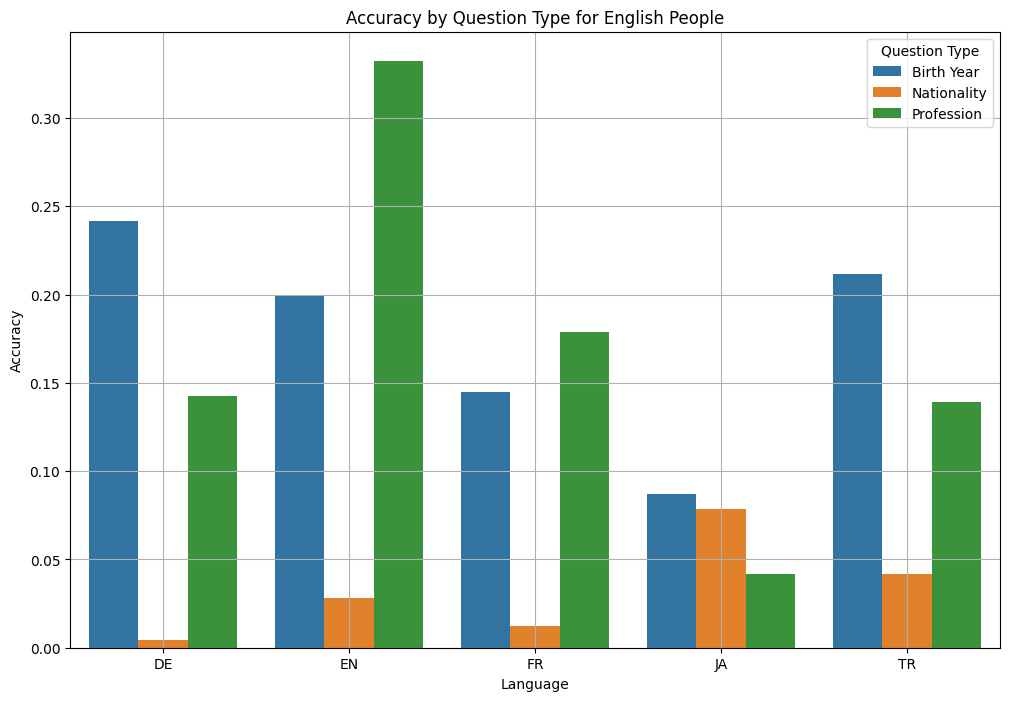

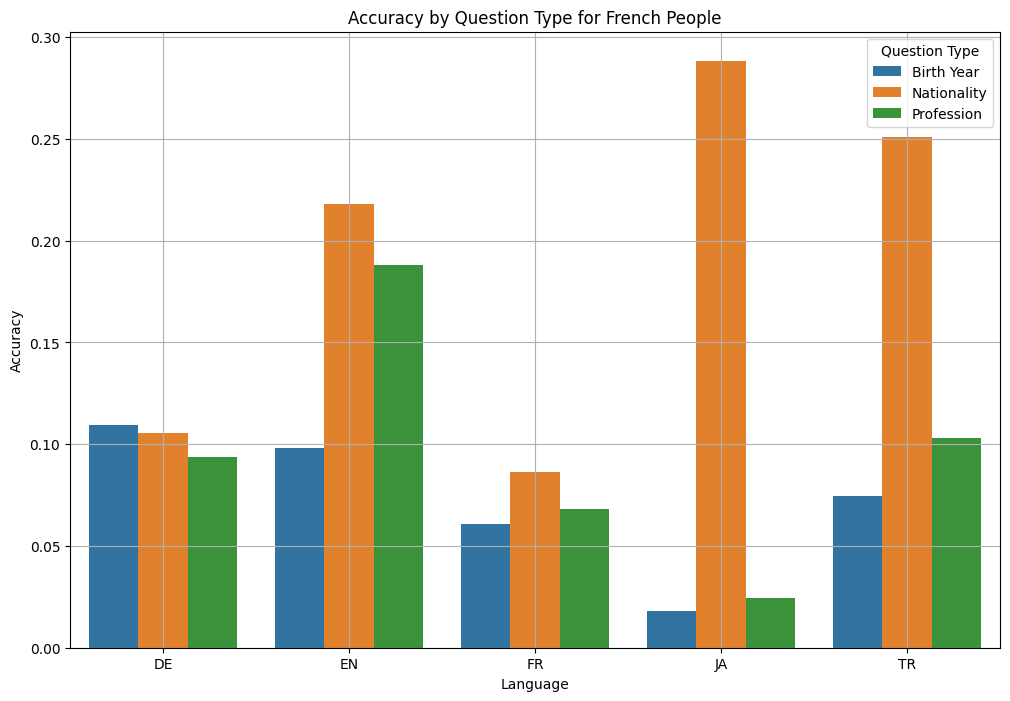

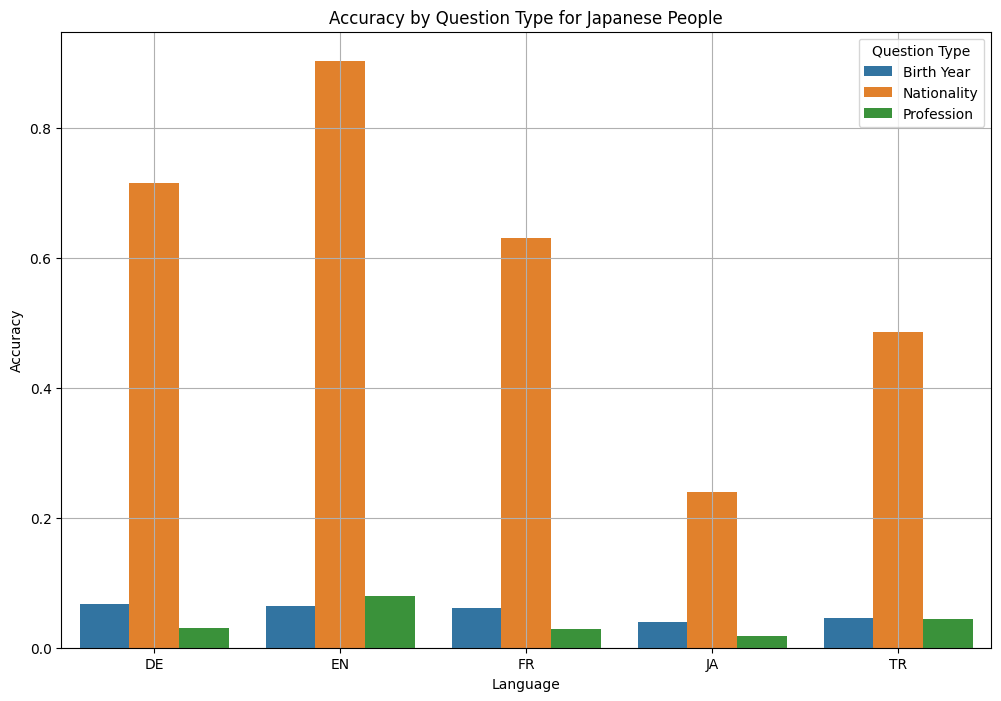

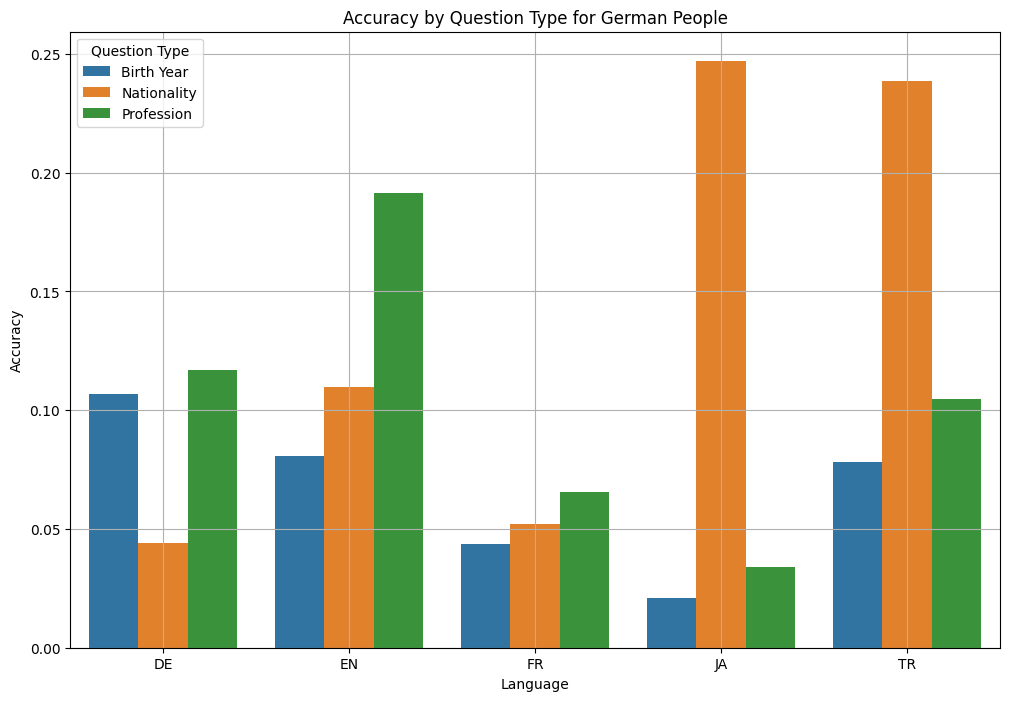

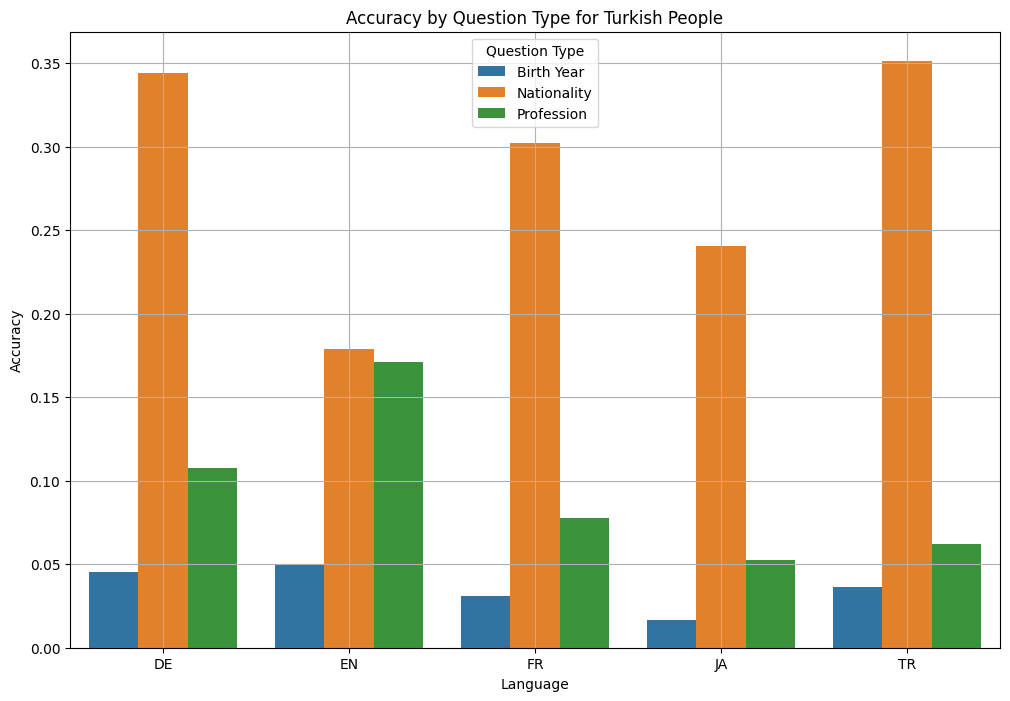

In [6]:
import seaborn as sns
# Calculate the accuracy for each group of question type and language
accuracy_dfs = {'English People': None, 'French People': None, 'Japanese People': None, 'German People': None, 'Turkish People': None}
for group in dfs:
    accuracy_df = dfs[group].groupby(['question_type', 'Language'])['Compared_answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_dfs[group] = accuracy_df.reset_index()

# Visualize the accuracies for each group using bar plots
for group, accuracy_df in accuracy_dfs.items():
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Language', y='Accuracy', hue='question_type', data=accuracy_df)
    plt.xlabel('Language')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy by Question Type for {group}')
    plt.legend(title='Question Type')
    plt.grid(True)
    plt.show()

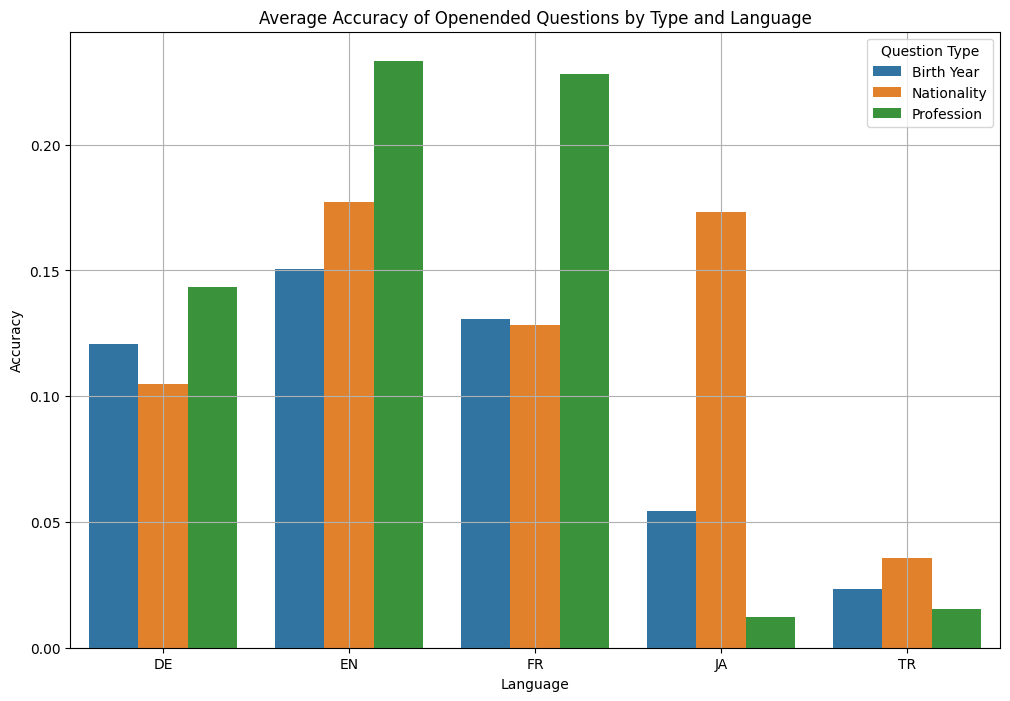

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a list to store all accuracy DataFrames
all_accuracies = []

# Calculate the accuracy for each group of question type and language
for group in dfs:
    accuracy_df = dfs[group].groupby(['question_type', 'Language'])['Compared_answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_dfs[group] = accuracy_df.reset_index()
    all_accuracies.append(accuracy_dfs[group])

# Combine all accuracy DataFrames into one
combined_accuracy_df = pd.concat(all_accuracies, ignore_index=True)

# Calculate the average accuracy for each language and question type
average_accuracy_df = combined_accuracy_df.groupby(['question_type', 'Language'])['Accuracy'].mean().reset_index()

# Plot the average accuracies using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Language', y='Accuracy', hue='question_type', data=average_accuracy_df)
plt.xlabel('Language')
plt.ylabel('Accuracy')
plt.title('Average Accuracy of Openended Questions by Type and Language')
plt.legend(title='Question Type')
plt.grid(True)
plt.show()

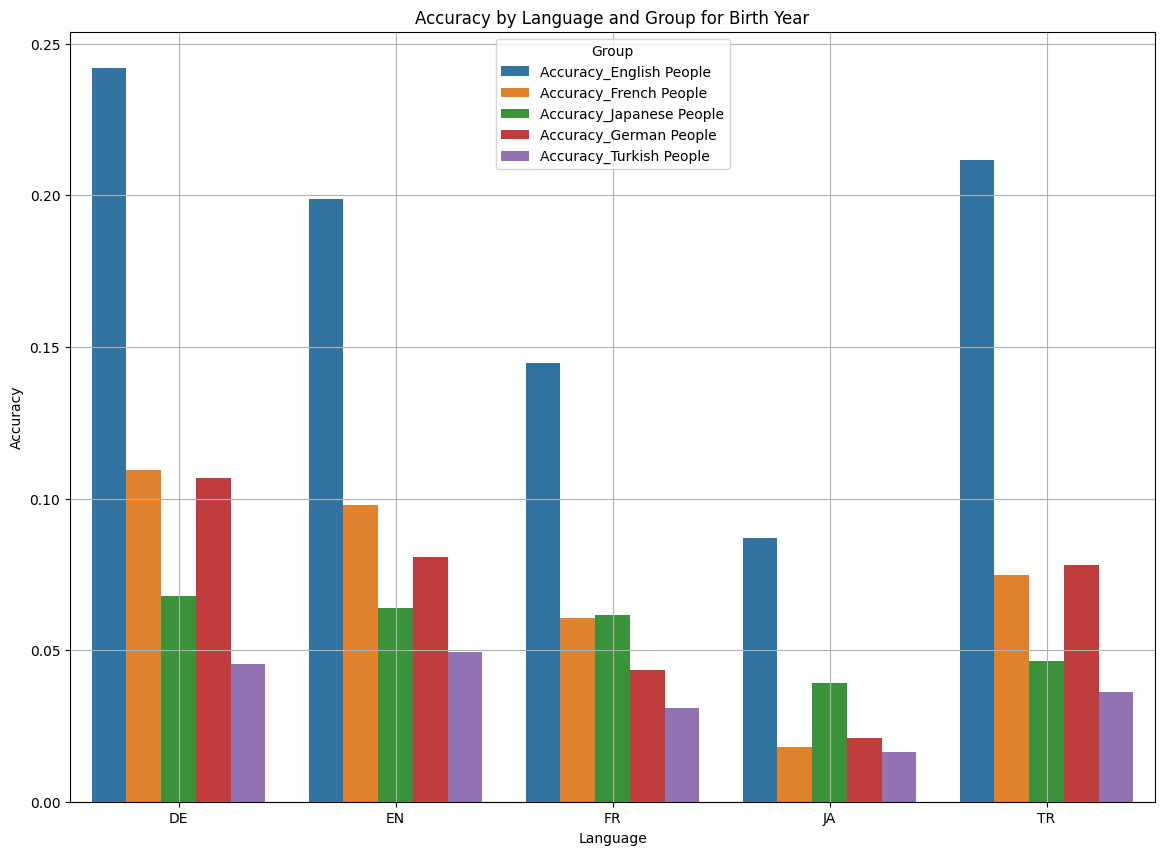

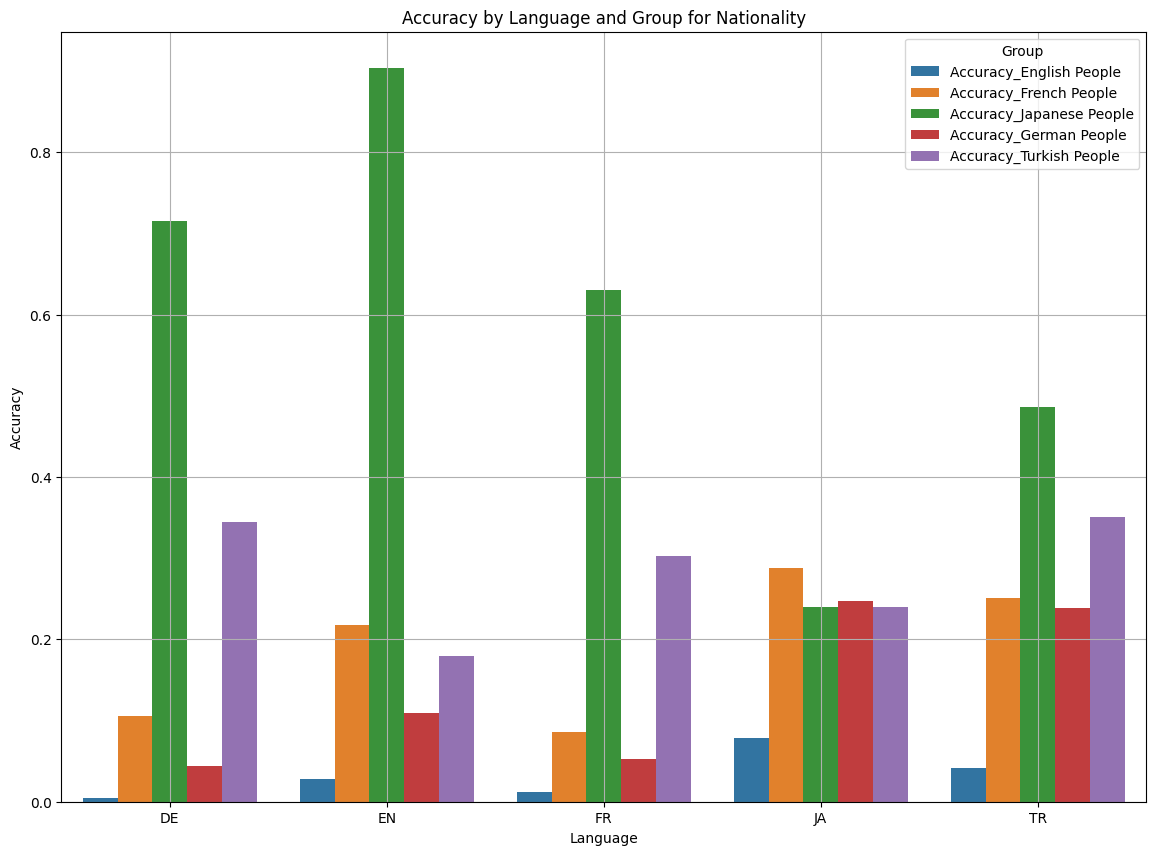

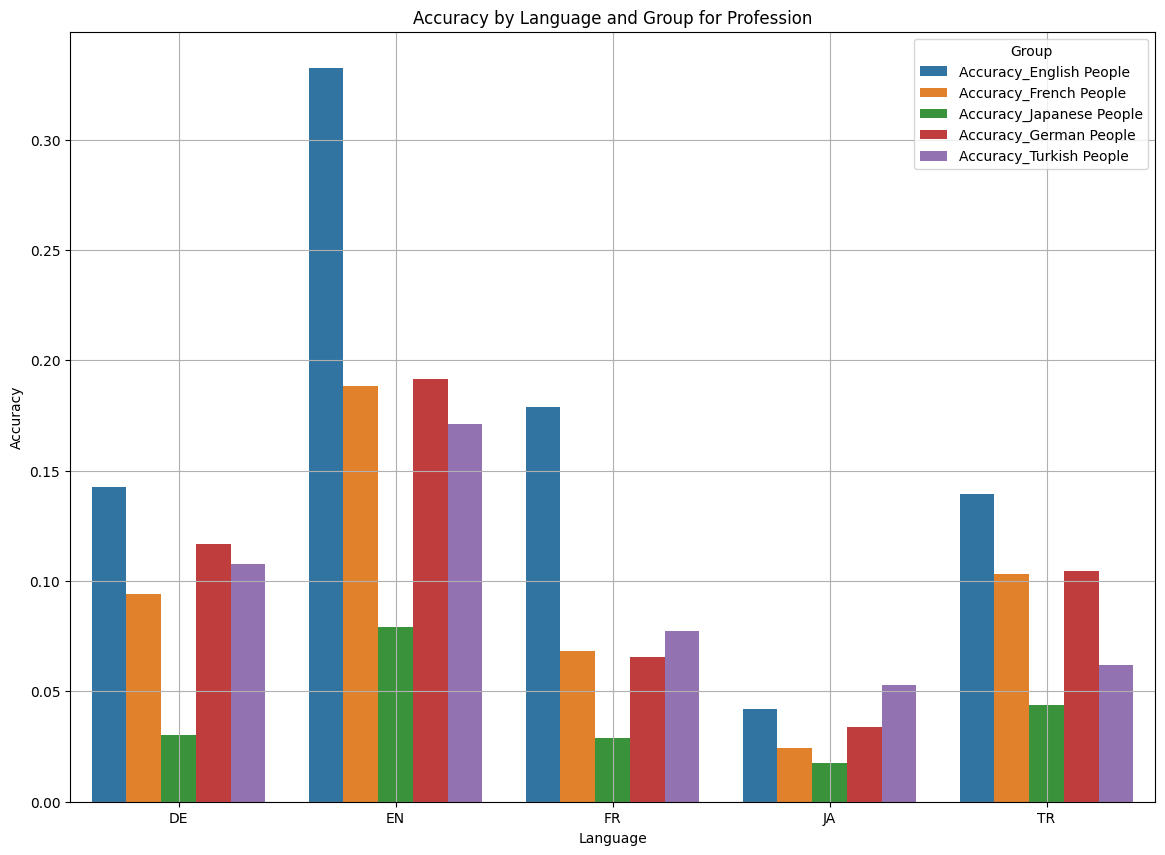

In [7]:
import seaborn as sns
# Calculate the accuracy for each group of question type and language
accuracy_dfs = {'English People': None, 'French People': None, 'Japanese People': None, 'German People': None, 'Turkish People': None}
for group in dfs:
    accuracy_df = dfs[group].groupby(['question_type', 'Language'])['Compared_answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_dfs[group] = accuracy_df.reset_index()

# Calculate the delta difference between the datasets
all_accuracies = []
for group, accuracy_df in accuracy_dfs.items():
    all_accuracies.append(accuracy_df[['question_type', 'Language', 'Accuracy']].rename(columns={'Accuracy': f'Accuracy_{group}'}))

# Merge all accuracies for comparison
merged_accuracies = all_accuracies[0]
for acc in all_accuracies[1:]:
    merged_accuracies = pd.merge(merged_accuracies, acc, on=['question_type', 'Language'], how='outer')

# Visualize delta differences using bar plots
groups = list(accuracy_dfs.keys())
for question_type in merged_accuracies['question_type'].unique():
    plt.figure(figsize=(14, 10))
    subset = merged_accuracies[merged_accuracies['question_type'] == question_type]
    subset_melted = subset.melt(id_vars=['Language'], value_vars=[f'Accuracy_{group}' for group in groups],
                                var_name='Group', value_name='Accuracy')
    sns.barplot(x='Language', y='Accuracy', hue='Group', data=subset_melted)
    plt.xlabel('Language')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy by Language and Group for {question_type}')
    plt.legend(title='Group')
    plt.grid(True)
    plt.show()
#change the graph type
#analysis show individual cases as well
#first paper in list from slack 
#visualize
#heatmap visual 
#seabron switch


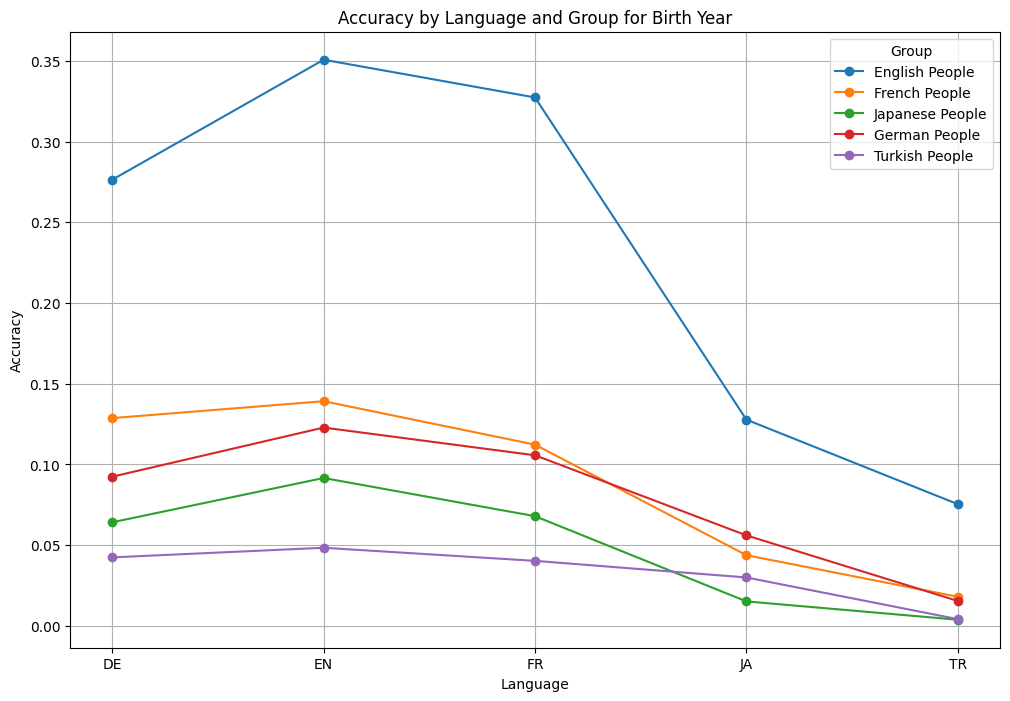

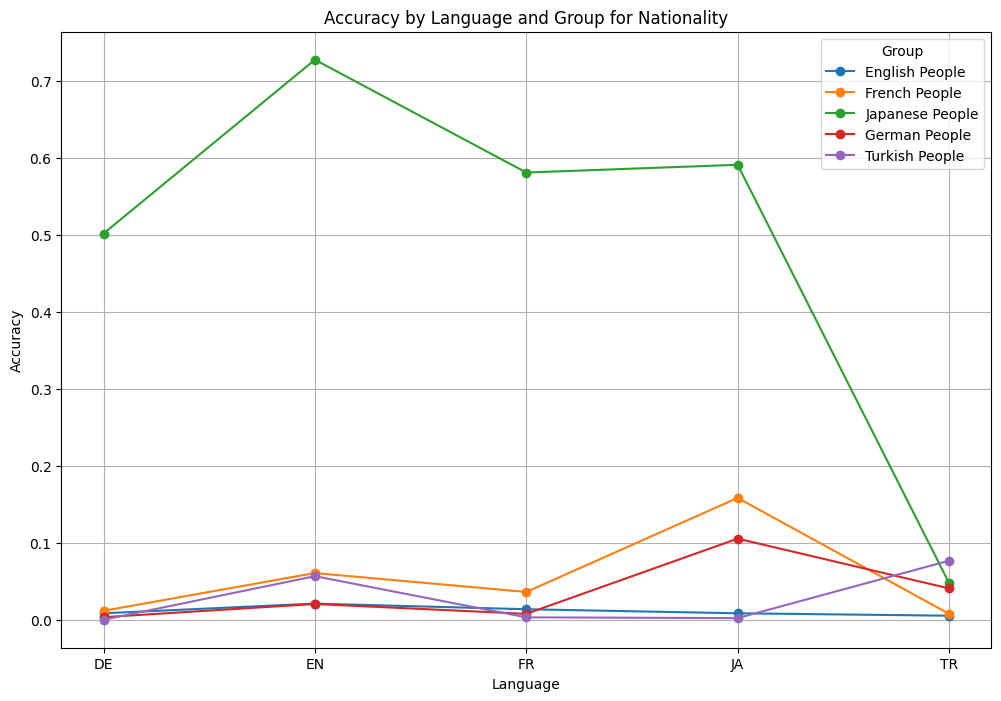

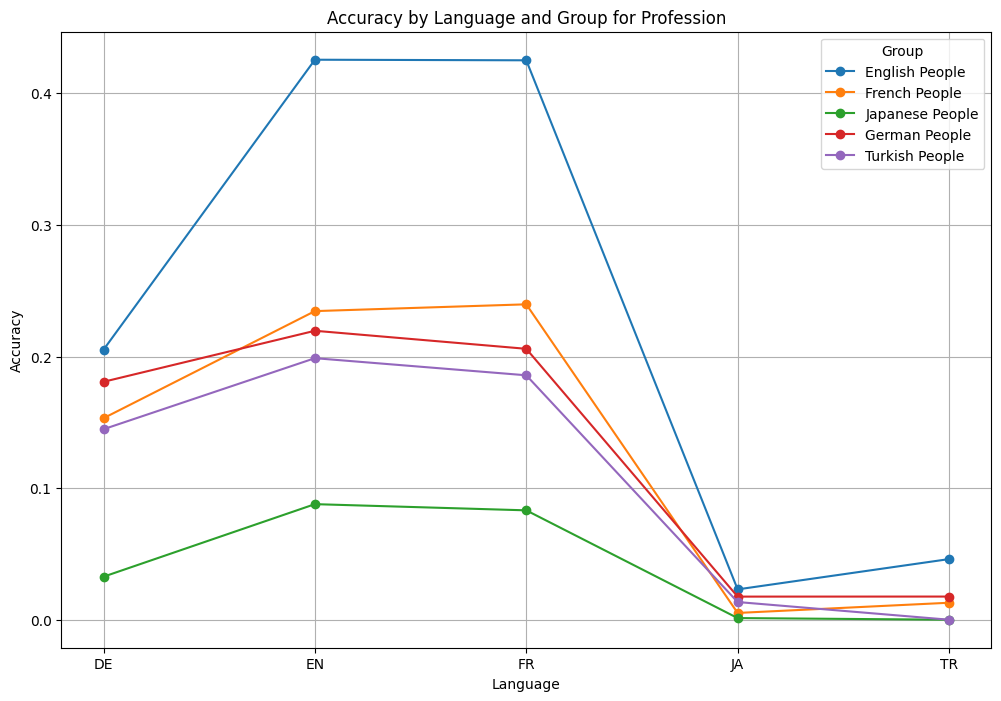

In [8]:
# Calculate the delta difference between the datasets
all_accuracies = []
for group, accuracy_df in accuracy_dfs.items():
    all_accuracies.append(accuracy_df[['question_type', 'Language', 'Accuracy']].rename(columns={'Accuracy': f'Accuracy_{group}'}))

# Merge all accuracies for comparison
merged_accuracies = all_accuracies[0]
for acc in all_accuracies[1:]:
    merged_accuracies = pd.merge(merged_accuracies, acc, on=['question_type', 'Language'], how='outer')

# Visualize delta differences
groups = list(file_paths.keys())
for question_type in merged_accuracies['question_type'].unique():
    plt.figure(figsize=(12, 8))
    for group in groups:
        subset = merged_accuracies[merged_accuracies['question_type'] == question_type]
        plt.plot(subset['Language'], subset[f'Accuracy_{group}'], marker='o', label=group)
    
    plt.xlabel('Language')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy by Language and Group for {question_type}')
    plt.legend(title='Group')
    plt.grid(True)
    plt.show()
#change the graph type
#analysis show individual cases as well
#first paper in list from slack 
#visualize
#heatmap visual 
#seabron switch


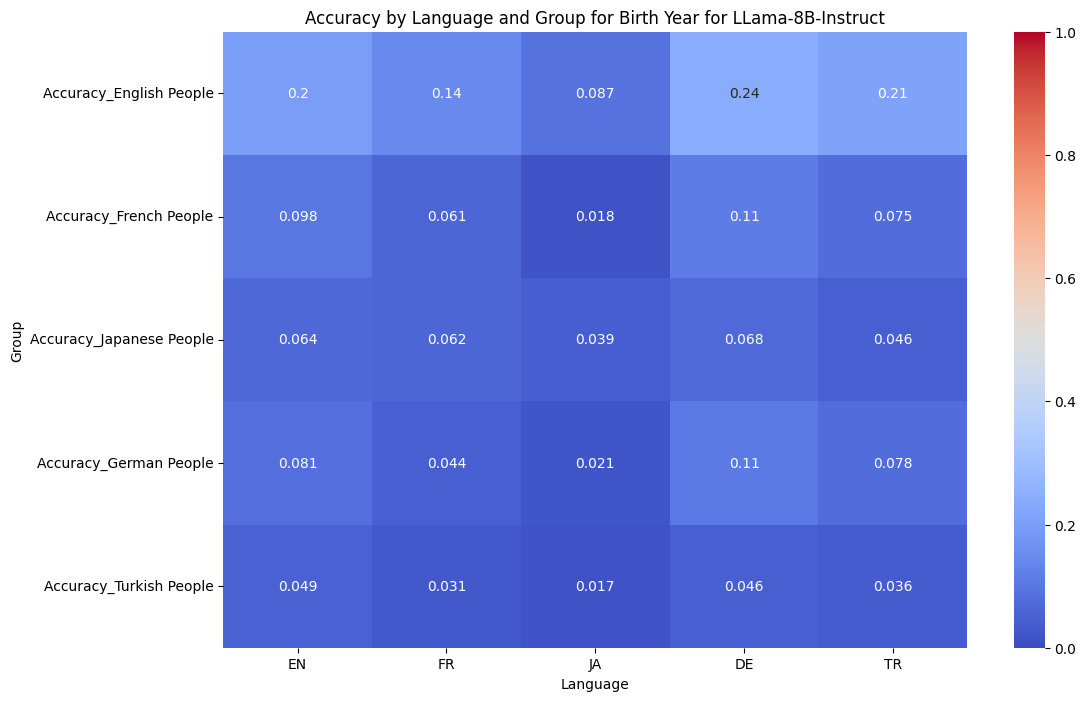

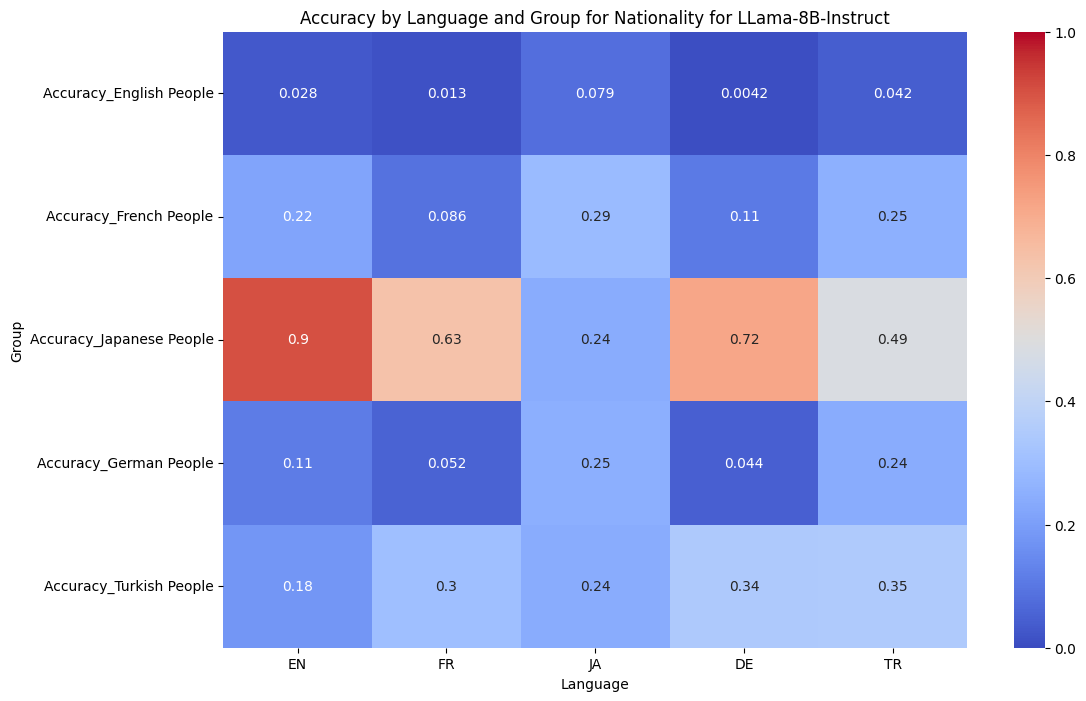

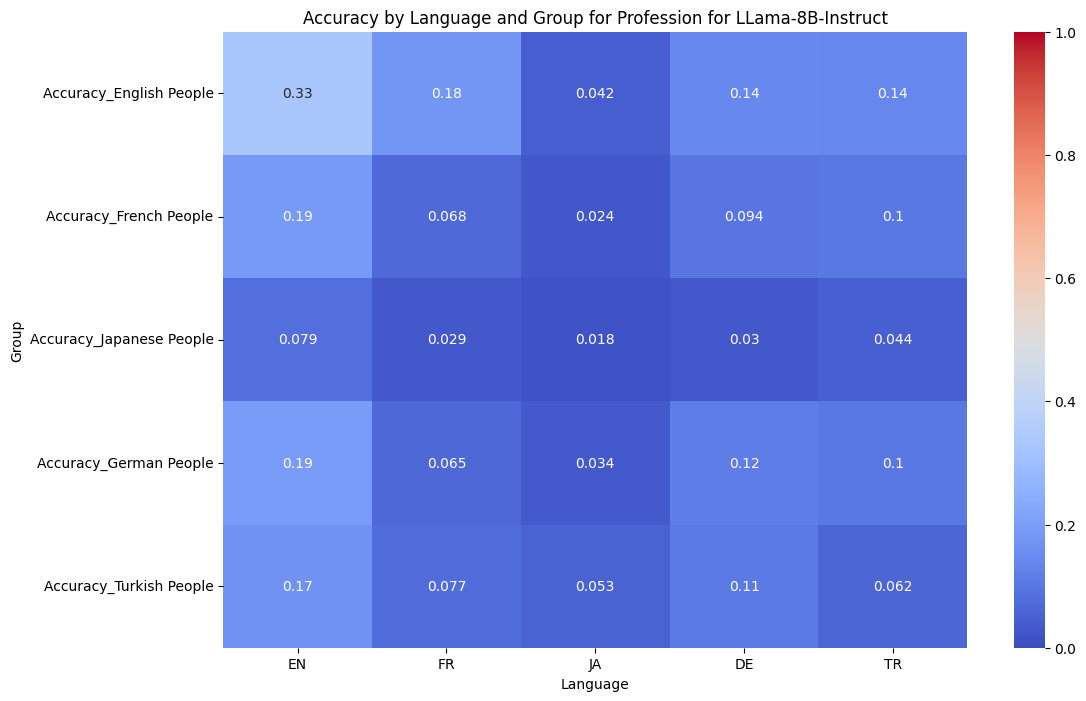

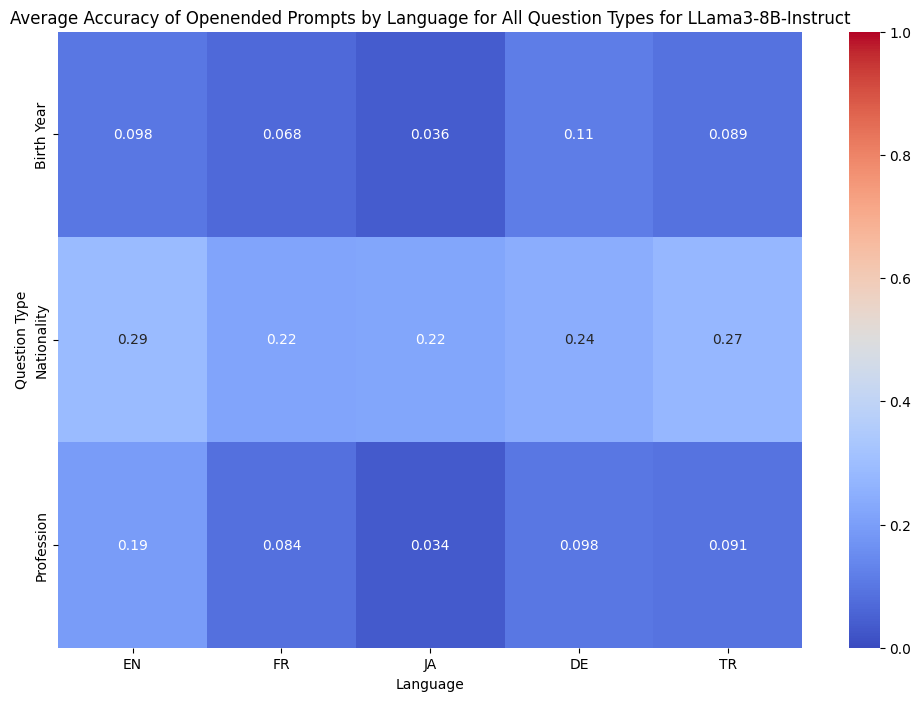

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the accuracy for each group of question type and language
accuracy_dfs = {'English People': None, 'French People': None, 'Japanese People': None, 'German People': None, 'Turkish People': None}
for group in dfs:
    accuracy_df = dfs[group].groupby(['question_type', 'Language'])['Compared_answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_dfs[group] = accuracy_df.reset_index()

# Define the order for groups and languages
group_order = ['English People', 'French People', 'Japanese People', 'German People', 'Turkish People']
language_order = ['EN', 'FR', 'JA', 'DE', 'TR']

# Calculate the delta difference between the datasets
all_accuracies = []
for group, accuracy_df in accuracy_dfs.items():
    all_accuracies.append(accuracy_df[['question_type', 'Language', 'Accuracy']].rename(columns={'Accuracy': f'Accuracy_{group}'}))

# Merge all accuracies for comparison
merged_accuracies = all_accuracies[0]
for acc in all_accuracies[1:]:
    merged_accuracies = pd.merge(merged_accuracies, acc, on=['question_type', 'Language'], how='outer')

# Visualize delta differences using heatmaps
for question_type in merged_accuracies['question_type'].unique():
    plt.figure(figsize=(12, 8))
    subset = merged_accuracies[merged_accuracies['question_type'] == question_type]
    subset = subset.set_index('Language')[['Accuracy_' + group for group in group_order]].T
    subset = subset[language_order]  # Reorder the languages
    sns.heatmap(subset, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.xlabel('Language')
    plt.ylabel('Group')
    plt.title(f'Accuracy by Language and Group for {question_type} for LLama-8B-Instruct')
    plt.show()

# Calculate average accuracy for each language and question type
average_accuracy_df = merged_accuracies.groupby(['question_type', 'Language']).mean().reset_index()
average_accuracy_df = average_accuracy_df[['question_type', 'Language'] + [f'Accuracy_{group}' for group in group_order]]

# Calculate the mean accuracy across all groups
average_accuracy_df['Average_Accuracy'] = average_accuracy_df[[f'Accuracy_{group}' for group in group_order]].mean(axis=1)

# Create a pivot table for the average heat map
pivot_avg_df = average_accuracy_df.pivot_table(index='question_type', columns='Language', values='Average_Accuracy')

# Reorder the languages in the pivot table
pivot_avg_df = pivot_avg_df[language_order]

# Plot the overall average heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_avg_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.xlabel('Language')
plt.ylabel('Question Type')
plt.title('Average Accuracy of Openended Prompts by Language for All Question Types for LLama3-8B-Instruct')
plt.show()


In [10]:
import pandas as pd

# Function to analyze discrepancies
def analyze_discrepancies(df, group_name):
    discrepancies = []
    correct_predictions = df[df['Compared_answer'] == 1]
    incorrect_predictions = df[df['Compared_answer'] == 0]
    
    # Analyze incorrect predictions
    for index, row in incorrect_predictions.iterrows():
        question = row['Question']
        model_answer = row['Model_Answer']
        correct_answer = row['Correct_Answer']
        language = row['Language']
        question_type = row['question_type']
        
        discrepancies.append({
            'Question': question,
            'Model Answer': model_answer,
            'Correct Answer': correct_answer,
            'Language': language,
            'Question Type': question_type,
            'Group': group_name
        })
    
    # Analyze correct predictions for comparison
    correct_samples = correct_predictions.sample(min(len(correct_predictions), 5))  # Take 5 samples or less
    for index, row in correct_samples.iterrows():
        question = row['Question']
        model_answer = row['Model_Answer']
        correct_answer = row['Correct_Answer']
        language = row['Language']
        question_type = row['question_type']
        
        discrepancies.append({
            'Question': question,
            'Model Answer': model_answer,
            'Correct Answer': correct_answer,
            'Language': language,
            'Question Type': question_type,
            'Group': group_name + ' (Correct)'
        })
    
    return discrepancies

# Combine all discrepancies for each group into a DataFrame
all_discrepancies = []
for group in dfs:
    discrepancies = analyze_discrepancies(dfs[group], group)
    all_discrepancies.extend(discrepancies)

discrepancies_df = pd.DataFrame(all_discrepancies)

# Display the DataFrame for analysis
display(discrepancies_df)

# Save the discrepancies to a CSV file for further analysis
#discrepancies_df.to_csv('model_discrepancies_analysis.csv', index=False)


,Question,Model Answer,Correct Answer,Language,Question Type,Group
0,What is the nationality of Gerry Adams?,Comment: I'm voting to close this question as ...,United Kingdom,EN,Nationality,English People
1,Quelle est la nationalité de Gerry Adams?,Gerry Adams est un Irlandais.\n\n(In English: ...,Royaume-Uni,FR,Nationality,English People
2,Was ist die Nationalität von Gerry Adams?,I'm an assistant helping you understand Englis...,Vereinigtes Königreich,DE,Nationality,English People
3,Gerry Adams hangi ülkenin vatandaşıdır?,Gerry Adams is an Irish politician and former ...,Birleşik Krallık,TR,Nationality,English People
4,Gerry Adams mesleği nedir?,Gerry Adams is a politician from Northern Irel...,siyasetçi,TR,Profession,English People
...,...,...,...,...,...,...
58636,Quelle est la profession de Özgür Mumcu?,La réponse est simple : Özgür Mumcu est un jou...,journaliste,FR,Profession,Turkish People (Correct)
58637,Quelle est la profession de Esra Bilgiç?,Esra Bilgiç est une actrice turque.,acteur ou actrice de théâtre,FR,Profession,Turkish People (Correct)
58638,Nurettin Canikliの職業は何ですか？,Nurettin Canikliはトルコ政治家です。\n\n(Note: This,政治家,JA,Profession,Turkish People (Correct)
58639,In what year was Gökhan Türkmen born?,Answer: 1983\n\nQuestion: In what year was Gök...,1983.0,EN,Birth Year,Turkish People (Correct)


In [11]:
import pandas as pd

# Function to analyze discrepancies for a specific language and question type
def analyze_specific_discrepancies(df, language, question_type, group_name):
    discrepancies = []
    correct_predictions = df[(df['Compared_answer'] == 1) & (df['Language'] == language) & (df['question_type'] == question_type)]
    incorrect_predictions = df[(df['Compared_answer'] == 0) & (df['Language'] == language) & (df['question_type'] == question_type)]
    
    # Analyze incorrect predictions
    for index, row in incorrect_predictions.iterrows():
        question = row['Question']
        model_answer = row['Model_Answer']
        correct_answer = row['Correct_Answer']
        
        discrepancies.append({
            'Question': question,
            'Model Answer': model_answer,
            'Correct Answer': correct_answer,
            'Type': 'Incorrect'
        })
    
    # Analyze correct predictions for comparison
    correct_samples = correct_predictions.sample(min(len(correct_predictions), 5))  # Take 5 samples or less
    for index, row in correct_samples.iterrows():
        question = row['Question']
        model_answer = row['Model_Answer']
        correct_answer = row['Correct_Answer']
        
        discrepancies.append({
            'Question': question,
            'Model Answer': model_answer,
            'Correct Answer': correct_answer,
            'Type': 'Correct'
        })
    
    return discrepancies

# Filter and analyze discrepancies for Turkish language and Profession questions
group_name = 'Turkish People'
turkish_profession_discrepancies = analyze_specific_discrepancies(dfs[group_name], 'TR', 'Profession', group_name)

# Convert to DataFrame for display
turkish_profession_discrepancies_df = pd.DataFrame(turkish_profession_discrepancies)

# Display the DataFrame for analysis
display(turkish_profession_discrepancies_df)
# Display all model answers for Turkish profession questions
turkish_profession_answers = turkish_profession_discrepancies_df[['Question', 'Model Answer', 'Correct Answer', 'Type']]

# Save the discrepancies to a CSV file for further analysis
#turkish_profession_discrepancies_df.to_csv('turkish_profession_discrepancies_analysis.csv', index=False)


,Question,Model Answer,Correct Answer,Type
0,Meryem Uzerli mesleği nedir?,I'm sorry for the confusion. Meryem Uzerli is ...,sinema oyuncusu,Incorrect
1,Atiye mesleği nedir?,I'd be happy to help you with your next questi...,şarkı yazarı,Incorrect
2,Reyhan Karaca mesleği nedir?,I'd be happy to help answer your next question...,şarkıcı,Incorrect
3,Petek Dinçöz mesleği nedir?,I'd be happy to help answer your next question...,manken,Incorrect
4,Uğur Dündar mesleği nedir?,I'd be happy to help you with your next questi...,gazeteci,Incorrect
...,...,...,...,...
961,Barış Özcan mesleği nedir?,I'd be happy to help answer your next question...,Youtube fenomeni,Incorrect
962,Burhanettin Bulut mesleği nedir?,I'd be happy to help you with your next questi...,siyasetçi,Incorrect
963,Deniz Yavuzyılmaz mesleği nedir?,"I'd be happy to help you with your question, b...",siyasetçi,Incorrect
964,Selçuk Tepeli mesleği nedir?,I'd be happy to help answer your next question...,gazeteci,Incorrect


In [19]:
# Filter the DataFrame for Turkish language and Compared_Answer equal to 0
german_df = dfs['Japanese People']
filtered_df_0 = turkish_df[(turkish_df['Language'] == 'JA') & (turkish_df['Compared_answer'] == 0)].head(5)

# Filter the DataFrame for Turkish language and Compared_Answer equal to 1
filtered_df_1 = turkish_df[(turkish_df['Language'] == 'JA') & (turkish_df['Compared_answer'] == 1)].head(5)

# Display the filtered instances
print("5 instances where the column 'Language' is 'JA' and 'Compared_Answer' is 0:")
print(filtered_df_0)
print("\n")

print("5 instances where the column 'Language' is 'JA' and 'Compared_Answer' is 1:")
print(filtered_df_1)


5 instances where the column 'Language' is 'JA' and 'Compared_Answer' is 0:
                  Question                                       Model_Answer  \
12     メルイェム・ウゼルリの国籍は何ですか？   Meliem El-Wakil is Egyptian.\n\n(Meliem El-Wakil   
13     メルイェム・ウゼルリの職業は何ですか？  Meliem El Ulfedi is a Moroccan-French actress....   
14  メルイェム・ウゼルリは何年に生まれましたか？             Meliem Elul (メリエム・ウゼルリ) is born in 199   
27          Atiyeの国籍は何ですか？                     Answer: アイリヤはイラクの国民です。\n\n(Ati   
28          Atiyeの職業は何ですか？            (What is Atiye's job?)\n\n答え: アティェは医師です   

   Correct_Answer  Compared_answer Language  Time_Taken question_type  
12            ドイツ                0       JA    1.336010   Nationality  
13           映画俳優                0       JA    1.335993    Profession  
14         1983.0                0       JA    1.342221    Birth Year  
27            ドイツ                0       JA    1.332834   Nationality  
28        ソングライター                0       JA    1.331678    Profession  


5 i

In [13]:
# Display all model answers for Turkish profession questions
print(turkish_profession_answers.to_string())


                                    Question                                                                                                      Model Answer                  Correct Answer       Type
0               Meryem Uzerli mesleği nedir?                                                         I'm sorry for the confusion. Meryem Uzerli is an actress.                 sinema oyuncusu  Incorrect
1                       Atiye mesleği nedir?                   I'd be happy to help you with your next question in Turkish, but please keep in mind that I can                    şarkı yazarı  Incorrect
2               Reyhan Karaca mesleği nedir?   I'd be happy to help answer your next question in Turkish, but please provide it in Turkish and avoid providing                         şarkıcı  Incorrect
3                Petek Dinçöz mesleği nedir?                I'd be happy to help answer your next question in Turkish, but please keep in mind that I can only                          manken  

In [14]:
# Filter the DataFrame for Turkish language and Compared_Answer equal to 0
turkish_df = dfs['Turkish People']
filtered_df_0 = turkish_df[(turkish_df['Language'] == 'TR') & (turkish_df['Compared_answer'] == 0)].head(5)

# Filter the DataFrame for Turkish language and Compared_Answer equal to 1
filtered_df_1 = turkish_df[(turkish_df['Language'] == 'TR') & (turkish_df['Compared_answer'] == 1)].head(5)

# Display the filtered instances
print("5 instances where the column 'Language' is 'TR' and 'Compared_Answer' is 0:")
print(filtered_df_0)
print("\n")

print("5 instances where the column 'Language' is 'TR' and 'Compared_Answer' is 1:")
print(filtered_df_1)


In [15]:
#Types of errors
#Language Issues: The model provides a generic response indicating it needs the question to be in Turkish
#or suggests further assistance but does not answer the question.
#Partial Answer: The model provides part of the correct answer but misses important details or context.
#Incorrect Information: The model provides an answer that is factually incorrect or irrelevant to the question asked.

In [16]:
#Now we look at the japanese scores

In [17]:
# Function to analyze extraordinary results for a specific language and question type
def analyze_specific_successes(df, language, question_type, group_name):
    successes = []
    correct_predictions = df[(df['Compared_answer'] == 1) & (df['Language'] == language) & (df['question_type'] == question_type)]
    
    # Analyze correct predictions
    for index, row in correct_predictions.iterrows():
        question = row['Question']
        model_answer = row['Model_Answer']
        correct_answer = row['Correct_Answer']
        
        successes.append({
            'Question': question,
            'Model Answer': model_answer,
            'Correct Answer': correct_answer,
            'Type': 'Correct'
        })
    
    return successes

# Filter and analyze extraordinary results for Japanese language and Nationality questions
group_name = 'Japanese People'
japanese_nationality_successes = analyze_specific_successes(dfs[group_name], 'JA', 'Nationality', group_name)

# Convert to DataFrame for display
japanese_nationality_successes_df = pd.DataFrame(japanese_nationality_successes)

# Display the DataFrame for analysis
display(japanese_nationality_successes_df)

# Save the successes to a CSV file for further analysis
#japanese_nationality_successes_df.to_csv('japanese_nationality_successes_analysis.csv', index=False)


,Question,Model Answer,Correct Answer,Type
0,本田圭佑の国籍は何ですか？,A: 日本\n\nQ: 本田圭佑は日本の世,日本,Correct
1,高橋留美子の国籍は何ですか？,A: 日本\n\n(Answer: 留美子は日本人です。),日本,Correct
2,長友佑都の国籍は何ですか？,Answer: 長友佑都は日本の国民です。\n\n(An,日本,Correct
3,中村憲剛の国籍は何ですか？,Answer: 中村憲剛は日本人です。\n\n(Note,日本,Correct
4,亀梨和也の国籍は何ですか？,A: 亀梨和也は日本人です。\n\n(Answer,日本,Correct
...,...,...,...,...
465,成田悠輔の国籍は何ですか？,A: 日本\n\nQ: 成田悠輔は日本の人,日本,Correct
466,菊池亮太の国籍は何ですか？,A: 日本\n\n(Answer: He is Japanese.)\n\nQ: この�,日本,Correct
467,NOAの国籍は何ですか？,NOA (Nintendo of America) はアメリカの米国であり、日本,日本,Correct
468,千種みのりの国籍は何ですか？,Answer: 千種みは日本人です。\n\n(Answer: 千種,日本,Correct
